## Introduction

#### Introduction This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

#### ‘ScheduledDay’ tells us on what day the patient set up their appointment.

#### ‘Neighborhood’ indicates the location of the hospital.

#### ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

#### Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as snb
%matplotlib inline

## Data Wrangling
### In this section of the report, we will load in the data, check for cleanliness, and then trim and clean dataset for analysis.

In [2]:
df_no =pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_no.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# using info to see is there is a missing values
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df_no.shape

(110527, 14)

In [5]:
# identifying the row index of -1 value for the age

find =df_no.query( "Age == '-1' ")
find

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [6]:
df_no.duplicated().sum()

0

In [7]:
#check for unique values

df_no["PatientId"].nunique()

62299

there is only 62299 out of 110527 are unique values

In [8]:
#checking for duplicat values at PatientId

df_no["PatientId"].duplicated().sum()
48228

48228

there is 48228 duplication at PatientId

In [9]:
#checking for duplicat values at PatientId and No-show

df_no.duplicated(["PatientId" , "No-show"]).sum()

38710

there is 38710 PatientId have the same No-show status

Data Cleaning

In [10]:
#remove the -1 value for age
df_no.drop(index= 99832,inplace =True)
df_no.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#removing duplicated Ids with the same showing status
df_no.drop_duplicates(['PatientId' , 'No-show'],inplace = True)

df_no.shape

(71816, 14)

In [12]:
df_no.drop(['PatientId', 'AppointmentID', 'ScheduledDay' , 'AppointmentDay'],axis=1 ,inplace=True)
df_no.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df_no.rename(columns={'No-show':'No_show'},inplace =True)
df_no.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


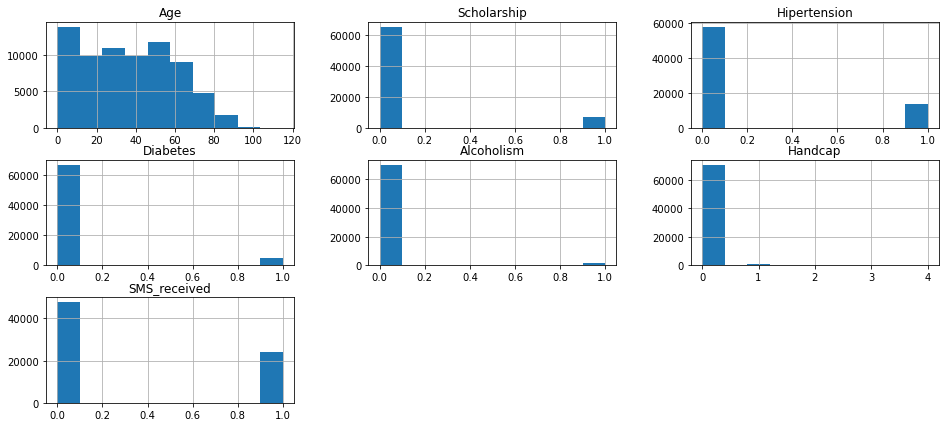

In [14]:
df_no.hist(figsize = (16,7));

In [15]:
#we will div the patient to 2 groups (show & not show)

show=df_no.No_show == "No"
noshow=df_no.No_show=="Yes"
df_no[show].count() ,df_no[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

number of showed patient is 54153 and no_showed is 17663

## investigation for the factors on the attendance rate

In [16]:
def label(x , y , t):
    """
    Args:
    x (str) : x-axis title
    y (str) : y-axis title
    t (str) : main title
    
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

## investigation for the factors on the attendance rate

## Question 1
### Does age affect the attend?

In [17]:
df_show_Age = df_no.Age[show]
df_noshow_Age = df_no.Age[noshow]

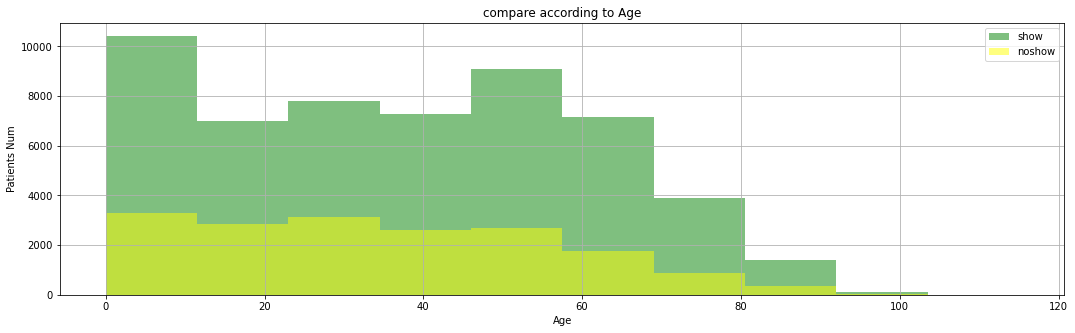

In [18]:
plt.figure(figsize=[18,5])
df_show_Age.hist(alpha=.5,bins=10,color ='green',label='show')
df_noshow_Age.hist(alpha=.5,bins=10,color ='yellow',label='noshow')
plt.legend();
label("Age" , "Patients Num" ,"compare according to Age" )

## Question 2
### Does gender affect the attend?

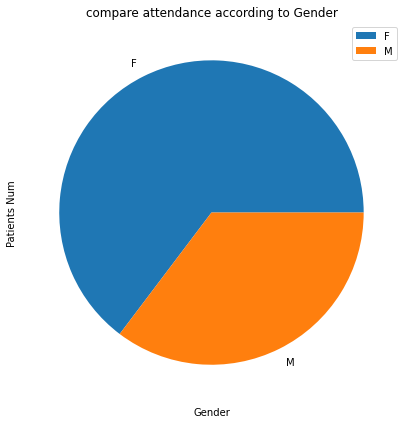

In [19]:
plt.figure(figsize=[12,7])
df_no.Gender.value_counts(normalize=True).plot(kind="pie")
plt.legend();
label("Gender" , "Patients Num" ,"compare attendance according to Gender" )

In [20]:
df_show_Gender = df_no.Gender[show].value_counts()
df_noshow_Gender = df_no.Gender[noshow].value_counts()

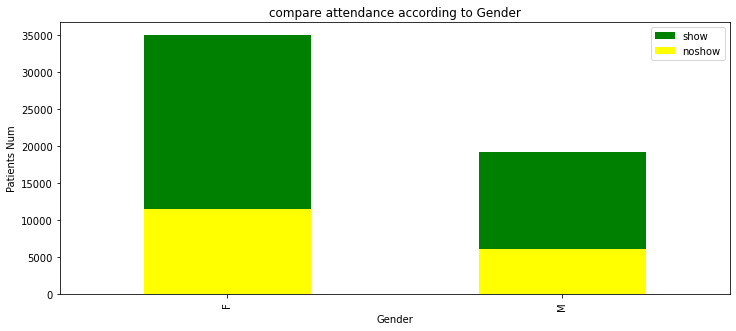

In [21]:
plt.figure(figsize=[12,5])
df_show_Gender.plot(kind="bar",color='green',label="show")
df_noshow_Gender.plot(kind="bar",color='yellow',label="noshow")
plt.legend();
label("Gender" , "Patients Num" ,"compare attendance according to Gender" )

## Question 3
### Does receiving SMS or NOT affect the attend?¶

In [22]:
df_show_SMS = df_no.SMS_received[show]
df_noshow_SMS = df_no.SMS_received[noshow]

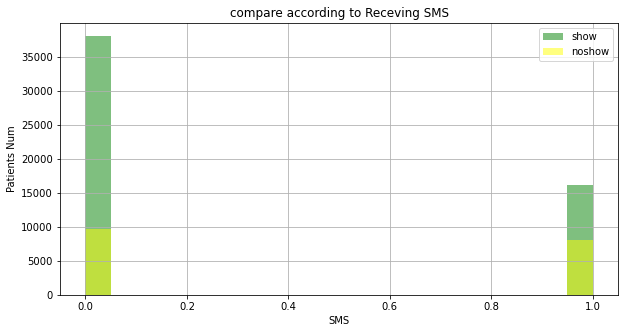

In [23]:
plt.figure(figsize=[10,5])
df_show_SMS.hist(alpha=.5,bins=20,color ='green',label='show')
df_noshow_SMS.hist(alpha=.5,bins=20,color ='yellow',label='noshow')
plt.legend();
label("SMS" , "Patients Num" ,"compare according to Receving SMS" )

Number of showing patient without receving SMS is greater than showing patients with receving SMS

## Question 4
### Does neigtbourhood affect the attend?

In [24]:
df_show_NH = df_no.Neighbourhood[show].value_counts()
df_noshow_NH = df_no.Neighbourhood[noshow].value_counts()

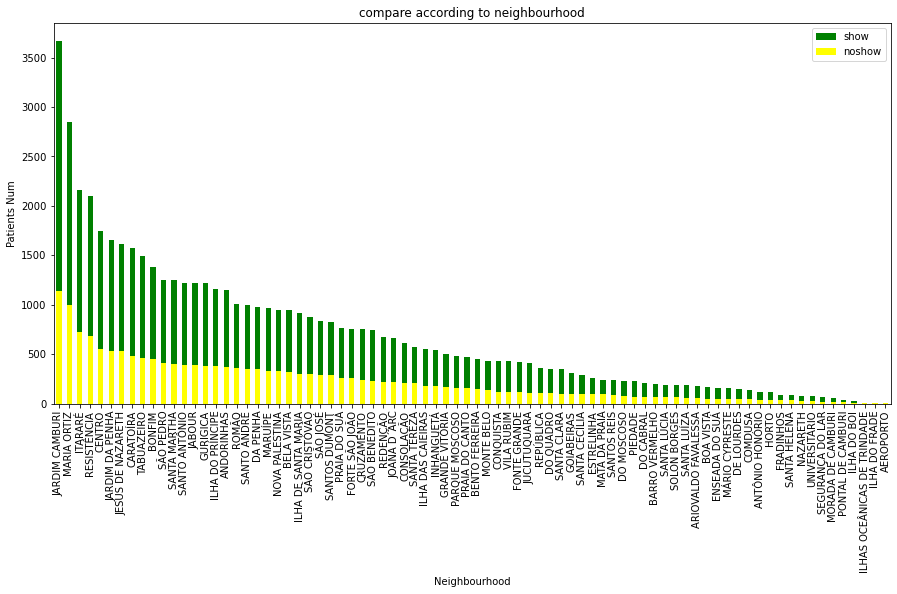

In [25]:
plt.figure(figsize=[15,7])
df_show_NH.plot(kind="bar",color='green',label="show")
df_noshow_NH.plot(kind="bar",color='yellow',label="noshow")
plt.legend();
label("Neighbourhood" , "Patients Num" ,"compare according to neighbourhood" )

We See the neighbourhood has a great effect on attend

## Question 5
### Does age and chronic diseases affect the attend?¶

In [26]:
df_show_HD = df_no[show].groupby(['Hipertension','Diabetes']).mean()['Age']
df_noshow_HD = df_no[noshow].groupby(['Hipertension','Diabetes']).mean()['Age']

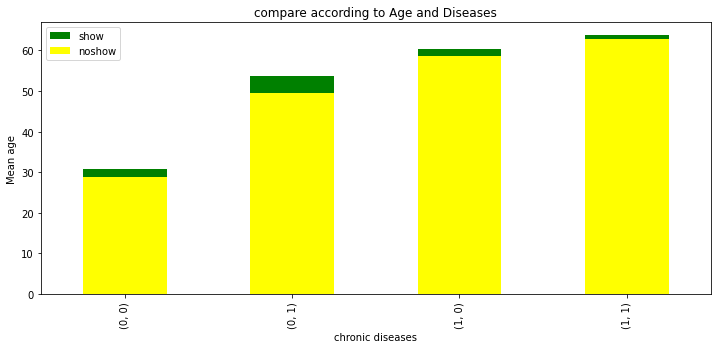

In [27]:
plt.figure(figsize=[12,5])
df_show_HD.plot(kind="bar",color='green',label="show")
df_noshow_HD.plot(kind="bar",color='yellow',label="noshow")
plt.legend();
label("chronic diseases" , "Mean age" ,"compare according to Age and Diseases" )

There is no correlation between age and Diseases

## Question 6
### Does age and gender affect on attend?

In [28]:
df_show_G = df_no[show].groupby('Gender').Age.mean()
df_noshow_G = df_no[noshow].groupby('Gender').Age.mean()

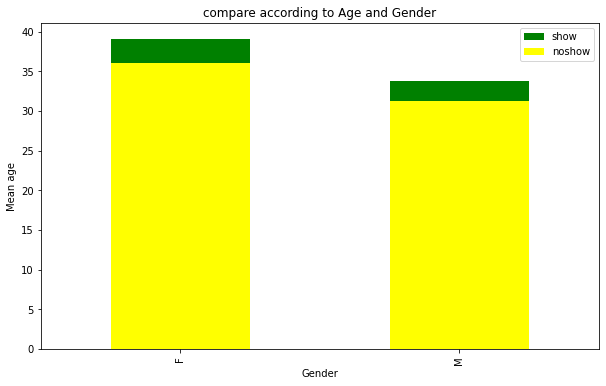

In [29]:
plt.figure(figsize=[10,6])
df_show_G.plot(kind="bar",color='green',label="show")
df_noshow_G.plot(kind="bar",color='yellow',label="noshow")
plt.legend();
label("Gender" , "Mean age" ,"compare according to Age and Gender" )

There is no correlation between age and gender

## Question 7
### Does Age and Neighbourhood affect on attend?

In [30]:
df_show_NA = df_no[show].groupby('Neighbourhood').Age.mean()
df_noshow_NA = df_no[noshow].groupby('Neighbourhood').Age.mean()

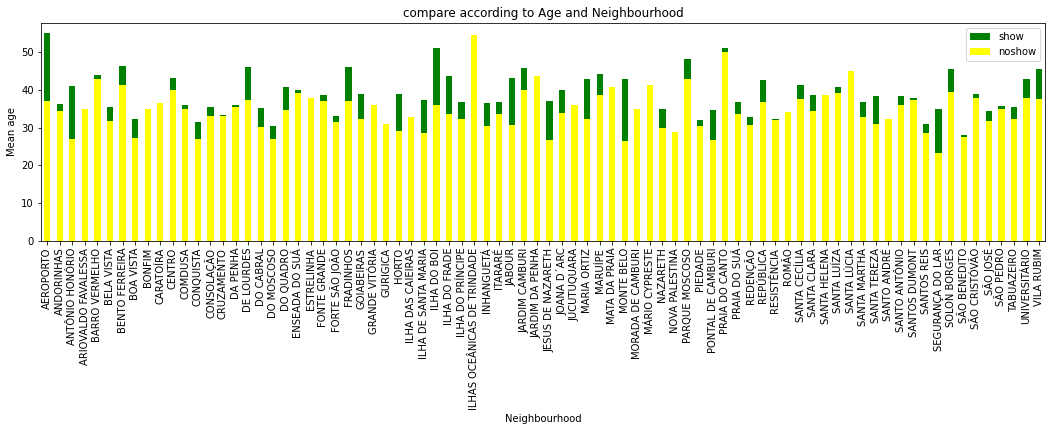

In [31]:
plt.figure(figsize=[18,4])
df_show_NA.plot(kind="bar",color='green',label="show")
df_noshow_NA.plot(kind="bar",color='yellow',label="noshow")
plt.legend();
label("Neighbourhood" , "Mean age" ,"compare according to Age and Neighbourhood" )

Attend from specific Neighbourhood differ according to ages

## Question 8
### Does Receiving SMS and Neighbourhood affect on attend?

In [32]:
df_show_NS = df_no[show].groupby('Neighbourhood').SMS_received.mean()
df_noshow_NS = df_no[noshow].groupby('Neighbourhood').SMS_received.mean()

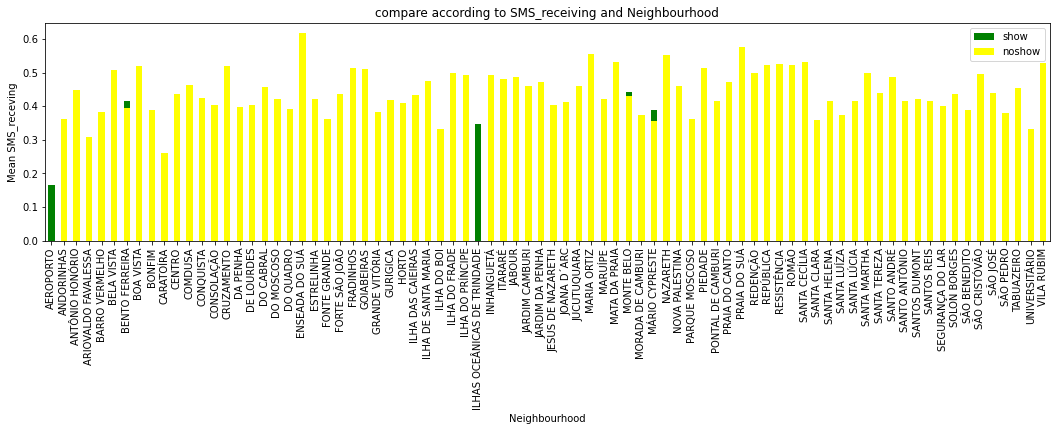

In [33]:
plt.figure(figsize=[18,4])
df_show_NS.plot(kind="bar",color='green',label="show")
df_noshow_NS.plot(kind="bar",color='yellow',label="noshow")
plt.legend();
label("Neighbourhood" , "Mean SMS_receving" ,"compare according to SMS_receiving and Neighbourhood" )

SMS has response in only 5 neighbourhoods

## Conclusions
Neighbourhood has a great effect on attend

Number of showing patients from specific neighbourhood affected by receiving SMS and Ages

Number of showing patients without receiving SMS is greater than showing patients with receiving SMS

### Limitations
There is no clear corrolation between showing and Gender , Chronic Diseases

In [36]:
df_no.to_csv("no_show.csv")